# Demo code for week 5 lecture
Demonstrates for-loops, lists, and split, replace, and join and **pandas**.


In [3]:

cds_full = open('cds_2022.csv', encoding='utf-8-sig').read().split('\n')

#understand what you've just imported
print(type(cds_full))
print(len(cds_full))

<class 'list'>
4977


In [4]:
# isolate header row
cds_header = cds_full[0].split(";")

# print number of categories in header row
print("Number of categories in header:",len(cds_header))

# isolate content of the csv (select everything after first row)
cds_content = cds_full[1:]

# get index numbers corresponding with first ten headers
for i in range(len(cds_header[:10])):
    print(f"{cds_header[i]} [{i}]")


Number of categories in header: 47
category [0]
agency [1]
account [2]
project [3]
recipient [4]
location [5]
state [6]
budget_request [7]
additional_amount [8]
amount [9]


### Create a dictionary totaling count in each category


In [5]:
dictionary = {}

for row in cds_content:
    fields = row.split(";")
    field = fields[0]
    
    if field not in dictionary:
        dictionary[field] = 1
    else:
        dictionary[field] += 1
    
dictionary

{'Agriculture, Rural Development, Food and Drug Administration, and Related Agencies': 239,
 'Commerce, Justice, Science, and Related Agencies': 496,
 'Defense': 15,
 'Energy and Water Development, and Related Agencies': 248,
 'Financial Services and General Government': 145,
 'Homeland Security': 122,
 'Interior, Environment, and Related Agencies': 608,
 'Labor, Health and Human Services, Education, and Related Agencies': 1538,
 'Military Construction, Veterans Affairs, and Related Agencies': 72,
 'Transportation, and Housing and Urban Development, and Related Agencies': 1492,
 '': 1}

### Store total amount for each category in a dictionary


In [16]:
# index of amount "column" [9]
# PREPROCESS THE AMOUNT COLUMN
# remove misc. characters that might inhibit it being read as an integer


##first, let's figure out what might cause problems

#for each row in the list of contents
for row in cds_content: 
    if row: # ignores empty rows which would process as "False"
        fields = row.split(";") #split row by semicolon to get individual elements (aka each column)
        if type(fields[9]) != int: #if the type of the element in the amount column for this row isn't an integer
            try:
                int(fields[9]) #try making it an integer
            except: #if what we "tried" above fails, print the element in question in order to troubleshoot
                print(fields[9],type(fields[9]))

## based on output, we know one issue is commas and one is dash and others appear to be empty spaces
## replace these values below

— <class 'str'>
2,959,000 <class 'str'>
 <class 'str'>
 <class 'str'>
 <class 'str'>


In [18]:
# index of amount [9]


total = {}

for row in cds_content: #for each row in the list of contents
    if row: # ignores empty rows which would process as "False"

        #split the row by semicolon
        fields = row.split(";")
        #select the "category" element (the first element in the newly split list)
        category = fields[0]

        #based on what we learned above, clean "amount" value
        amount = fields[9].replace(",","").replace(" ","").replace("—","")
        
        if amount: #if not empty
            amount = int(amount) #convert to int
            #if the category of this row isn't in the dictionary, add it and set
            if category not in total:
                total[category] = amount

            else:
                total[category] += amount
                
total

{'Agriculture, Rural Development, Food and Drug Administration, and Related Agencies': 346323506,
 'Commerce, Justice, Science, and Related Agencies': 566621000,
 'Defense': 23516666,
 'Energy and Water Development, and Related Agencies': 1375636000,
 'Financial Services and General Government': 173286638,
 'Homeland Security': 203098811,
 'Interior, Environment, and Related Agencies': 1008723095,
 'Labor, Health and Human Services, Education, and Related Agencies': 1751637000,
 'Military Construction, Veterans Affairs, and Related Agencies': 1265910000,
 'Transportation, and Housing and Urban Development, and Related Agencies': 2971241432}

## Demo with Pandas

Pandas introduces a new data type, the data frame. All tables are data frames in pandas. The way you make a dataframe is really easy. First, you `import pandas as pd`, by convention. Then you can call the function `pd.DataFrame()`. It doesn't do anything on its own but you can pass it a table-like piece of data and it will convert it to a data frame.

By convention, we assign the output of that to a variable called `[name]_df` indicating that it's a data frame.

In [3]:
import pandas as pd
import numpy as np

In [24]:

players = []

for i in range(3):
  name = "name"+str(i)
  n_rolls = np.random.randint(1, 4)
  players.append({'name': name,
                  'rolls': np.random.randint(1, 7, n_rolls)})
  
players

[{'name': 'name0', 'rolls': array([1])},
 {'name': 'name1', 'rolls': array([4, 5, 5])},
 {'name': 'name2', 'rolls': array([6, 3])}]

In [30]:
players_df = pd.DataFrame(players)
players_df

,name,rolls
0,name0,[1]
1,name1,"[4, 5, 5]"
2,name2,"[6, 3]"


In [29]:
#select by column
players_df["rolls"]

#then select by index
players_df["rolls"][0]

0          [1]
1    [4, 5, 5]
2       [6, 3]
Name: rolls, dtype: object

### Back to congressionally directed spending example

In [5]:
cds_df = pd.read_csv('cds_2022_clean.csv')
cds_df.head(2)

,category,agency,account,project,recipient,location,state,budget_request,additional_amount,amount,...,requestor_seven_chamber,requestor_seven_party,requestor_eight_full_name,requestor_eight_bioguide_id,requestor_eight_chamber,requestor_eight_party,requestor_nine_full_name,requestor_nine_bioguide_id,requestor_nine_chamber,requestor_nine_party
0,"Agriculture, Rural Development, Food and Drug ...",Animal and Plant Health Inspection Service,APHIS S&E,Statewide Pest Surveys,Alaska Division of Agriculture,NaN,AK,NaN,NaN,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Agriculture, Rural Development, Food and Drug ...",Animal and Plant Health Inspection Service,APHIS S&E,Feral Swine Management,Arkansas Department of Agriculture,NaN,AR,NaN,NaN,650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# isolate rows using iloc
cds_df.iloc[1]

category                       Agriculture, Rural Development, Food and Drug ...
agency                                Animal and Plant Health Inspection Service
account                                                                APHIS S&E
project                                                   Feral Swine Management
recipient                                     Arkansas Department of Agriculture
location                                                                     NaN
state                                                                         AR
budget_request                                                               NaN
additional_amount                                                            NaN
amount                                                                    650000
origination                                                                    S
requestor_one_full_name                                             John Boozman
requestor_one_bioguide_id   

In [11]:
# isolate elements with additional slice
cds_df.iloc[1][0]

/tmp/ipykernel_11023/1556488285.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cds_df.iloc[1][0]


'Agriculture, Rural Development, Food and Drug Administration, and Related Agencies'

In [7]:
# get columns
cds_df.columns

Index(['category', 'agency', 'account', 'project', 'recipient', 'location',
       'state', 'budget_request', 'additional_amount', 'amount', 'origination',
       'requestor_one_full_name', 'requestor_one_bioguide_id',
       'requestor_one_chamber', 'requestor_one_party',
       'requestor_two_full_name', 'requestor_two_bioguide_id',
       'requestor_two_chamber', 'requestor_two_party',
       'requestor_three_full_name', 'requestor_three_bioguide_id',
       'requestor_three_chamber', 'requestor_three_party',
       'requestor_four_full_name', 'requestor_four_bioguide_id',
       'requestor_four_chamber', 'requestor_four_party',
       'requestor_five_full_name', 'requestor_five_bioguide_id',
       'requestor_five_chamber', 'requestor_five_party',
       'requestor_six_full_name', 'requestor_six_bioguide_id',
       'requestor_six_chamber', 'requestor_six_party',
       'requestor_seven_full_name', 'requestor_seven_bioguide_id',
       'requestor_seven_chamber', 'requestor_seven_pa

In [13]:
#get specific column
cds_df["amount"]

0        100000
1        650000
2        600000
3        600000
4        250000
         ...   
4970    2500000
4971    3000000
4972    3000000
4973    5000000
4974     500000
Name: amount, Length: 4975, dtype: object

### Another example

In [15]:
data = {
    'Category A': [10, 20, 30, 40, 50],
    'Category B': [15, 25, 35, 45, 55],
    'Category C': [20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)
df

,Category A,Category B,Category C
0,10,15,20
1,20,25,30
2,30,35,40
3,40,45,50
4,50,55,60


In [16]:
df.mean()

Category A    30.0
Category B    35.0
Category C    40.0
dtype: float64

In [17]:
df.median()

Category A    30.0
Category B    35.0
Category C    40.0
dtype: float64

In [22]:
print("Boolean result:\n",df["Category A"] > 20)
display("Filtered df:",df[df["Category A"] > 20])

Boolean result:
 0    False
1    False
2     True
3     True
4     True
Name: Category A, dtype: bool


'Filtered df:'

,Category A,Category B,Category C
2,30,35,40
3,40,45,50
4,50,55,60


### Even data vis is possible with pandas!

<Axes: title={'center': 'Line Plot of Categories'}>

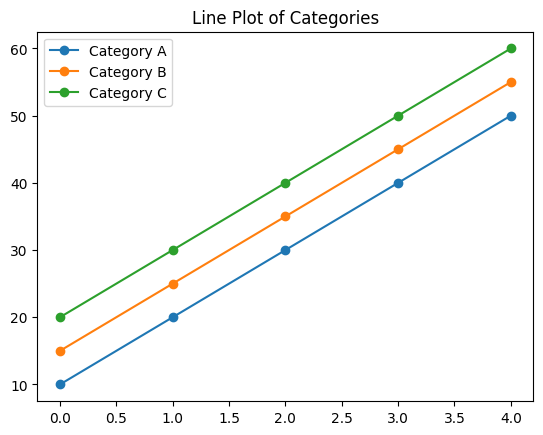

In [23]:
import matplotlib.pyplot as plt

df.plot(kind='line', marker='o', title='Line Plot of Categories')